In [1]:
# pip install spacy

In [2]:
# !pip install textblob 

In [3]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.tokenize.toktok import ToktokTokenizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import spacy
nlp = spacy.load('en_core_web_sm', disable=['ner'])

In [4]:
#Load the data and visualize the top five rows using the panadas
data=pd.read_csv('D:/Sentiment Analysis/Test.csv')
data.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [5]:
#print the shape of the data
data.shape

(5000, 2)

In [6]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [7]:
#read the train data using pandas library
train = pd.read_csv('D:/Sentiment Analysis/Train.csv')
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [8]:
#print the shape of the train data
train.shape

(40000, 2)

In [9]:
#train data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [10]:
#to visualize the label percentage in the train data set
pie = train['label'].value_counts()
pie

0    20019
1    19981
Name: label, dtype: int64

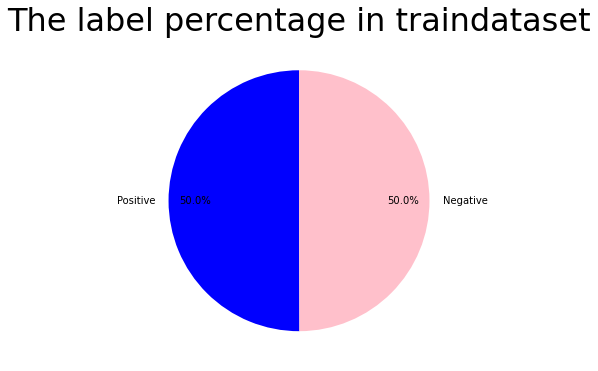

In [11]:
#to visualize above information in the pie chart
plt.figure(figsize = (18, 6))
plt.pie(pie, labels = ['Positive', 'Negative'], colors = ['blue', 'pink'], autopct='%1.1f%%',pctdistance=0.8,startangle=90)
#set the title name with fontsize
plt.title("The label percentage in traindataset",fontsize=32)
plt.show()

In [12]:
#lets check sentiment using textblob
TextBlob ("he is very good boy").sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [13]:
# lets check another sentiment using textblob
TextBlob("Even though I have great interest in Biblical").sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

## Polarity and Subjectivity

####Polarity is a float value which helps in identifying whether a sentence is positive or negative. Its
values ranges in [-1,1] where 1 means positive statement and -1 means a negative statement.

On the other side, Subjective sentences generally refer to personal opinion, emotion or
judgment whereas objective refers to factual information. Subjectivity is also a float which lies in
the range of [0,1]. Closer the value to 1, more likely it is public opinion.

In [14]:
#Take only 5000 samples data and add the data
label_0 = train[train['label'] == 0].sample(n = 5000)
label_1 = train[train['label'] == 1].sample(n = 5000)
train = pd.concat([label_1, label_0])

In [15]:
from sklearn.utils import shuffle 
train = shuffle(train)
train.head()

,text,label
35679,I am not a usual commenter on this website but...,1
19706,"This show should be titled, ""When Bad Writing ...",0
32977,"Ghillie a remake of the Telugu ""okkadu' is tha...",1
9298,You'll notice by the stars I've given this GRE...,1
13788,Betty and Boris eye each other at a junior dan...,1


# Data PreProcessing

In [16]:
#check the null value in the train data set
train.isna().sum()

text     0
label    0
dtype: int64

In [17]:
#replace the null values with np.nan
train.replace(r'^\s*$',np.nan,regex=True,inplace=True)
train.dropna(axis=0,how='any',inplace=True)

In [18]:
train.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True)
print('escape seq removed')

escape seq removed


In [19]:
train.head()

,text,label
35679,I am not a usual commenter on this website but...,1
19706,"This show should be titled, ""When Bad Writing ...",0
32977,"Ghillie a remake of the Telugu ""okkadu' is tha...",1
9298,You'll notice by the stars I've given this GRE...,1
13788,Betty and Boris eye each other at a junior dan...,1


In [20]:
train['text'] = train['text'].str.encode('ascii','ignore').str.decode('ascii')
print("Non-ascii has been removed!")

Non-ascii has been removed!


In [21]:
#let's import string and remove punctuation from the dataset
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
#Create the function to remove the punctuation marks
def remove_punctuation(text):
        for punctuation in string.punctuation:
            text = text.replace(punctuation,'')
        return text
#And apply function to the train data set
train['text'] = train['text'].apply(remove_punctuation)

In [23]:
train.head()

,text,label
35679,I am not a usual commenter on this website but...,1
19706,This show should be titled When Bad Writing Ha...,0
32977,Ghillie a remake of the Telugu okkadu is thank...,1
9298,Youll notice by the stars Ive given this GREAT...,1
13788,Betty and Boris eye each other at a junior dan...,1


In [24]:
#import nltk and import the stopwords
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
#create and remove the stopwords
stop_words_list = nltk.corpus.stopwords.words('english')
stop_words_list.remove('no')
stop_words_list.remove('not')

In [26]:
# pip install tokenizer

In [27]:
tokenizer = ToktokTokenizer()
#Create function to remove the stopwords
def remove_stopwords(text, is_lower_case = True):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filterd_tokens=[token for token in tokens if token not in stop_words_list]
    else:
        filterd_tokens=[token for token in tokens if token.lower() not in stop_words_list]
    filtered_text = ' '.join(filterd_tokens)
    return filtered_text

In [28]:
train['text'] = train['text'].apply(remove_stopwords)

In [29]:
#remove the special characters
def remove_special_characters(text):
    text=re.sub('[^a-zA-z0-9\s]','',text)
    return text

In [30]:
#apply the above function to train dataset
train['text'] = train['text'].apply(remove_special_characters)
train.head().style.background_gradient(cmap = 'jet')

,text,label
35679,I not usual commenter website seeing underrated movie I endeavour write comments remarks I fun watching movie perhaps Cat everything I wish I could I not going post spoilers reveal plots theres things really found amazing way manipulates people divine underrated movie I lack arguments I usually go enjoy speak little go movies fun really enjoyed 1h53 stayed dark room must seen delight fades away lets try not critical thank reading,1
19706,This show titled When Bad Writing Happens To Good Actors considering players demonstrated immense talent venues eg Andre Braugher Homicide Life Street David Morse St Elsewhere Im hoping frenetic pacing show adjusted series develops along obvious cliches dialogue absurd I wondered stupid writers imagined core audience Were beat head main points show instead left gradually figure almost writers feel must spell main character sort avenging angel sentenced redeem sins venial mortal via butting cab fares many affairs Watching premiere required much suspension disbelief Mike Olshanskeys fares would rapidly spill guts would feel driven intervene lives utter strangers That possesses SuperCop abilities things people weapons expert martial arts master psychologist fatherconfessor locksmith ad infinitum Pure drivelesque fantasy What recent televisions shows based Philidelphia seem imbued nasty exwife disrepectfully bratty child Overdone I wanted like show really I virtue premise slightly different many clones appearing seasons fare stars preferred actors But Im afraid another possibly good idea ruined careless execution,0
32977,Ghillie remake Telugu okkadu thankfully clarified version original It packs punch Dharani true cinematic brilliance delivers style panache A flagging Vijays career entry likes Surya Vikram fray got much needed uplift movie This might well prove best movie Vijay ever considering choices making since The hardworking actor seems lost bearing talented new entrants accepted industry public alikebr br The tightly snug script runs neckbreak speed revolves around Velu willful youngster aspiring make mark game Kabaddi popular game among boys India The events following chance encounter Muthupandi rescue girl distress juggles aspirations friends forms fulcrum end movie Vijay fits T role essays subdued believable portrayal boy next doorbr br Trisha stereotyped Tamil heroine mantle play The role far complex girl trouble With limited dialogs Trisha exploits occasional muted expressions subtle vulnerability add color role This classic case cover page girl comingofage become professional actress Trisha became personal favorite moviebr br The movie ends predictable lines although one credit Director keeping audience guessing many things including Trishas change decision leave country Prakash Raj deserves word praise providing perfect counterweight Vijays role His almost indomitable stature role villain apparent chinks heros armor form perfect ploy keeping audience guessingbr br Overall great movie deserves least single viewing I give clear 8 10,1
9298,Youll notice stars Ive given GREAT film see first time implied I never heard film happened across week last slow rental experience not much great coming Im not sure movie slipped past I love Lucy Liu Jeremy Northam great Still didbr br This movie awesome example dont large budget It right amount plot dialog make interesting keep viewer dark enough The entire film viewer trying figure plots many twists turns I would given film 1010 however shots pretty fake looking I dont hold film much I dont think deserves perfect scorebr br Lucy Liu beautiful mysterious always I think shes pretty underrated serious talent Nevermind beauty difficult really takes roles seriously doesnt rest appearance drive scenes sophisticated emotion And seem cold even lifeless needed wellbr br Jeremy Northam really well first quite geeky corporate rat willing run maze prove However changes throughout film like night day I know fans Clive Owen Jude Law hopefuls be

In [31]:
#Remove html patterns
def remove_html(text):
        html_pattern = re.compile('<.*?>')
        return html_pattern.sub(r' ',text)
#And apply the above function to the train data
train['text']=train['text'].apply(remove_html)

In [32]:
train.head()

,text,label
35679,I not usual commenter website seeing underrate...,1
19706,This show titled When Bad Writing Happens To G...,0
32977,Ghillie remake Telugu okkadu thankfully clarif...,1
9298,Youll notice stars Ive given GREAT film see fi...,1
13788,Betty Boris eye junior dance theyre still kids...,1


In [33]:
#Remove the html url from the train dataset
def remove_url(text):
 url=re.compile(r'https?://\S+|www\.\S+')
 return url.sub(r' ',text)
#And apply to the train dataset
train['text']=train['text'].apply(remove_url)
train.head()

,text,label
35679,I not usual commenter website seeing underrate...,1
19706,This show titled When Bad Writing Happens To G...,0
32977,Ghillie remake Telugu okkadu thankfully clarif...,1
9298,Youll notice stars Ive given GREAT film see fi...,1
13788,Betty Boris eye junior dance theyre still kids...,1


In [34]:
#Remove the numbers in the dataset
def remove_numbers(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text
#And apply the above function to the train data
train['text']=train['text'].apply(remove_numbers)

In [35]:
train.head()

,text,label
35679,I not usual commenter website seeing underrate...,1
19706,This show titled When Bad Writing Happens To G...,0
32977,Ghillie remake Telugu okkadu thankfully clarif...,1
9298,Youll notice stars Ive given GREAT film see fi...,1
13788,Betty Boris eye junior dance theyre still kids...,1


In [36]:
def cleanse(word):
    rx=re.compile(r'\D*\d')
    if rx.match(word):
        return ' '
    return word
#Remove the alpha numaric
def alpha_numeric(strings):
    nstrings=[' '.join(filter(None,(cleanse(word) for word in strings.split())))]
    stri=" ".join(nstrings)
    return stri
#Apply to the above function to the train dataset
train['text']=train['text'].apply(alpha_numeric)

In [37]:
train.head()

,text,label
35679,I not usual commenter website seeing underrate...,1
19706,This show titled When Bad Writing Happens To G...,0
32977,Ghillie remake Telugu okkadu thankfully clarif...,1
9298,Youll notice stars Ive given GREAT film see fi...,1
13788,Betty Boris eye junior dance theyre still kids...,1


In [38]:
#lemmatizer
def lemmatize(text):
    text=nlp(text)
    text=" ".join([word.lemma_ if word.lemma_!='-PRON-' else word for word in text])
    return text
#Apply the above function to the rain dataset
train['text']=train['text'].apply(lemmatize)

In [39]:
train.head()

,text,label
35679,I not usual commenter website see underrated m...,1
19706,this show title when bad writing happen to Goo...,0
32977,ghillie remake telugu okkadu thankfully clarif...,1
9298,you ll notice star I ve give great film see fi...,1
13788,Betty Boris eye junior dance they re still kid...,1


In [40]:
train['sentiment']=train['text'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [41]:
train.head()

,text,label,sentiment
35679,I not usual commenter website see underrated m...,1,"(0.19875000000000004, 0.445)"
19706,this show title when bad writing happen to Goo...,0,"(-0.06156597026162242, 0.6123188405797101)"
32977,ghillie remake telugu okkadu thankfully clarif...,1,"(0.14637909709338282, 0.44968769325912183)"
9298,you ll notice star I ve give great film see fi...,1,"(0.13167220376522704, 0.6045311923218898)"
13788,Betty Boris eye junior dance they re still kid...,1,"(0.07325757575757574, 0.5622222222222223)"


In [42]:
sentiment_series = train['sentiment'].tolist()

In [43]:
columns = ['polarity', 'subjectivity']
df1 = pd.DataFrame(sentiment_series, columns = columns, index = train.index)

In [44]:
df1.head().style.background_gradient(cmap = 'Reds')

,polarity,subjectivity
35679,0.198750,0.445000
19706,-0.061566,0.612319
32977,0.146379,0.449688
9298,0.131672,0.604531
13788,0.073258,0.562222


In [45]:
result = pd.concat([train, df1], axis = 1)

In [46]:
result.drop(['sentiment'], axis = 1, inplace = True)

In [47]:
result.loc[result['polarity']>=0.3, 'Sentiment'] = "Positive"
result.loc[result['polarity']<0.3, 'Sentiment'] = "Negative"

In [48]:
result.head()

,text,label,polarity,subjectivity,Sentiment
35679,I not usual commenter website see underrated m...,1,0.198750,0.445000,Negative
19706,this show title when bad writing happen to Goo...,0,-0.061566,0.612319,Negative
32977,ghillie remake telugu okkadu thankfully clarif...,1,0.146379,0.449688,Negative
9298,you ll notice star I ve give great film see fi...,1,0.131672,0.604531,Negative
13788,Betty Boris eye junior dance they re still kid...,1,0.073258,0.562222,Negative


In [49]:
result.loc[result['label']==1, 'Sentiment_label'] = 1
result.loc[result['label']==0, 'Sentiment_label'] = 0

In [50]:
result

,text,label,polarity,subjectivity,Sentiment,Sentiment_label
35679,I not usual commenter website see underrated m...,1,0.198750,0.445000,Negative,1.0
19706,this show title when bad writing happen to Goo...,0,-0.061566,0.612319,Negative,0.0
32977,ghillie remake telugu okkadu thankfully clarif...,1,0.146379,0.449688,Negative,1.0
9298,you ll notice star I ve give great film see fi...,1,0.131672,0.604531,Negative,1.0
13788,Betty Boris eye junior dance they re still kid...,1,0.073258,0.562222,Negative,1.0
...,...,...,...,...,...,...
22620,Business Executive kidnap make wander mile mil...,0,-0.125000,0.770000,Negative,0.0
36557,I want see movie article film magazine it be n...,0,-0.043193,0.543408,Negative,0.0
10948,I go see movie lady freind mine do not like he...,1,0.005882,0.373529,Negative,1.0
20118,be Warner Brothers second historical drama fea...,1,0.076979,0.432660,Negative,1.0


## finally we create our modelling

In [51]:
#check the columns in the dataset
result.columns

Index(['text', 'label', 'polarity', 'subjectivity', 'Sentiment',
       'Sentiment_label'],
      dtype='object')

In [52]:
#Divide the dataset into two variables
X = result['text'].values
Y = result['label'].values

In [53]:
#Convert the text into array using the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
#install the model
vector = TfidfVectorizer(lowercase = False)
vector.fit(X)
#Transform the above fitting data using TfidfVectorizer and finally print it
X = vector.fit_transform(X)
X

<10000x75606 sparse matrix of type '<class 'numpy.float64'>'
	with 1020881 stored elements in Compressed Sparse Row format>

In [55]:
#divided the data for train and test
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state = 2)

### Checking the model for logistic regression

In [56]:
# instance for the Logistic regression model
logistic=LogisticRegression()
#And fit the data to the model
logistic.fit(X_train,y_train)

LogisticRegression()

In [57]:
#prediction to the data
logistic_pred = logistic.predict(X_test)
logistic_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [58]:
#Check the test score and train score to the model
print(f'The Logisticregression model test score is {logistic.score(X_test,y_test)*100}')
#Train score for the data
print(f'The Logisticregression model train scores is {logistic.score(X_train,y_train)*100}')

The Logisticregression model test score is 86.04
The Logisticregression model train scores is 94.38666666666666


In [59]:
#import the accuracy_score and classification report to the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

The logistic Regression accuracy_score 86.04
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1247
           1       0.85      0.88      0.86      1253

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.86      2500
weighted avg       0.86      0.86      0.86      2500



<AxesSubplot:>

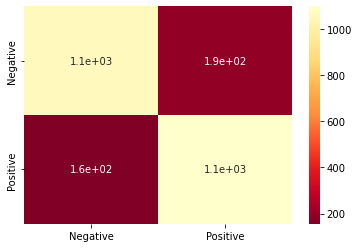

In [60]:
#Check the accuracy_score to the model
print(f'The logistic Regression accuracy_score {accuracy_score(y_test,logistic_pred)*100}')
#Classification report
print(classification_report(y_test,logistic_pred))
#confusion_matrix
cn=confusion_matrix(y_test,logistic_pred)
sns.heatmap(cn,annot=True,cmap='YlOrRd_r',xticklabels=['Negative','Positive'], yticklabels = ['Negative', 'Positive'],)

## Decision Tree Classifier

In [61]:
#Install the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#Install the model
tree = DecisionTreeClassifier()
#fit the model to train data
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
#prediction
tree_pred = tree.predict(X_test)
tree_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [63]:
#Check the test score and train score to the model
print(f'The DecisiontreeClassification model test score is {tree.score(X_test, y_test)*100}')
#Train score for the data
print(f'The DecisiontreeClassification model train scores is {tree.score(X_train, y_train)*100}')
#Check the accuracy_score to the model
print(f'The DecisiontreeClassification accuracy_score {accuracy_score(y_test,tree_pred)*100}')

The DecisiontreeClassification model test score is 68.52000000000001
The DecisiontreeClassification model train scores is 100.0
The DecisiontreeClassification accuracy_score 68.52000000000001


              precision    recall  f1-score   support

           0       0.69      0.68      0.68      1247
           1       0.69      0.69      0.69      1253

    accuracy                           0.69      2500
   macro avg       0.69      0.69      0.69      2500
weighted avg       0.69      0.69      0.69      2500



<AxesSubplot:>

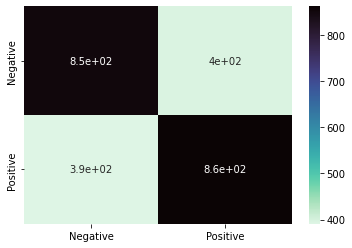

In [64]:
#Classification Report
print(classification_report(y_test, tree_pred))
#Confusion Matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap='mako_r',xticklabels=['Negative','Positive'],yticklabels = ['Negative', 'Positive'],)

### Random Forest Classifier

In [65]:
#Import the randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
#install the model 
random=RandomForestClassifier()
#fit the train data to mode
random.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
#prediction
random_pred = random.predict(X_test)
random_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [67]:
#Check the test score and train score to the model
print(f'The RandomForestClassifier model test score is {random.score(X_test,y_test)*100}')
#Train score for the data
print(f'The RandomForestClassifier model train scores is {random.score(X_train,y_train)*100}')
#Check the accuracy_score to the model
print(f'The RandomForestClassifier accuracy_score {accuracy_score(y_test,random_pred)*100}')

The RandomForestClassifier model test score is 82.0
The RandomForestClassifier model train scores is 100.0
The RandomForestClassifier accuracy_score 82.0


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1247
           1       0.83      0.81      0.82      1253

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



<AxesSubplot:>

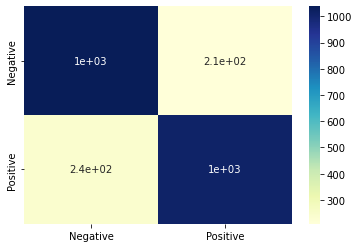

In [68]:
#Classification report
print(classification_report(y_test,random_pred))
#confusion_matrix
cn=confusion_matrix(y_test,random_pred)
sns.heatmap(cn,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels = ['Negative','Positive'],)

### Multinomial NB

In [69]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import MultinomialNB
#install the model
multinomial=MultinomialNB()
#fit the train data to our model
multinomial.fit(X_train,y_train)

MultinomialNB()

In [70]:
#Prediction to the test data
multinomial_pred=multinomial.predict(X_test)
multinomial_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [71]:
#Check the test score and train score to the model
print(f'The Multinomial model test score is {multinomial.score(X_test,y_test)*100}')
#Train score for the data
print(f'The Multinomial model train scores is {multinomial.score(X_train,y_train)*100}')
#Check the accuracy_score to the model
print(f'The RandomForestClassifier accuracy_score {accuracy_score(y_test,multinomial_pred)*100}')

The Multinomial model test score is 84.08
The Multinomial model train scores is 94.57333333333334
The RandomForestClassifier accuracy_score 84.08


              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1247
           1       0.89      0.78      0.83      1253

    accuracy                           0.84      2500
   macro avg       0.85      0.84      0.84      2500
weighted avg       0.85      0.84      0.84      2500



<AxesSubplot:>

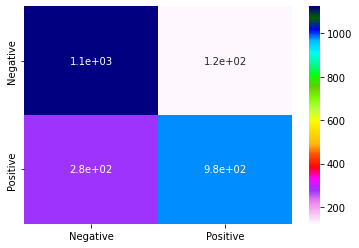

In [72]:
#Classification report
print(classification_report(y_test,multinomial_pred))
#confusion_matrix
cn=confusion_matrix(y_test,multinomial_pred)
sns.heatmap(cn,annot=True,cmap='gist_ncar_r',xticklabels=['Negative','Positive'], yticklabels = ['Negative','Positive'],)

### XGB Classifier

In [73]:
# !pip install xgboost
#import theXGBClssifier
from xgboost import XGBClassifier
#install the model
xgb=XGBClassifier()
#fit the data
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [74]:
#Prediction to the test data
xgb_pred=xgb.predict(X_test)
xgb_pred

array([0, 1, 0, ..., 0, 0, 1])

In [75]:
#Check the test score and train score to the model
print(f'The XGBClassifier model test score is {xgb.score(X_test,y_test)*100}')
#Train score for the data
print(f'The XGBClassifier model train scores is {xgb.score(X_train,y_train)*100}')
#Check the accuracy_score to the model
print(f'The XGBClassifier accuracy_score {accuracy_score(y_test,xgb_pred)*100}')

The XGBClassifier model test score is 82.0
The XGBClassifier model train scores is 98.85333333333334
The XGBClassifier accuracy_score 82.0


              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1247
           1       0.81      0.84      0.82      1253

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500



<AxesSubplot:>

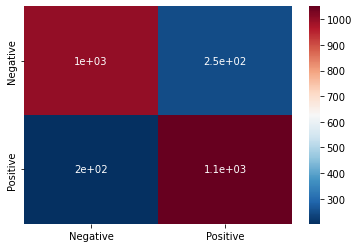

In [76]:
#Classification report
print(classification_report(y_test,xgb_pred))
#confusion_matrix
cn=confusion_matrix(y_test,xgb_pred)
sns.heatmap(cn,annot=True,cmap='RdBu_r',xticklabels=['Negative','Positive'],yticklabels = ['Negative','Positive'],)

### Hyperparameter Tunning

####A hyperparameter is a parameter whose value is set before the learning process begins.
Hyperparameters tuning is crucial as they control the overall behavior of a machine learning
model.
Every machine learning models will have different hyperparameters that can be set.

### Randomized Search CV

####RandomizedSearchCV is very useful when we have many parameters to try and the training
time is very long.
1.The first step is to write the parameters that we want to consider 2.From these parameters
select the best ones.(which are printed in output)

In [77]:
#Helper Function to perform hyper parameter tunning with RandomizedSearchCV
def random_search(model, X_train, Y_train, param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    # Random search of parameters, using 3 fold cross validation, 
 # search across 100 different combinations, and use all available cores
    random = RandomizedSearchCV(estimator = model, param_distributions = param_grid,n_iter=100,)
    random.fit(X_train, y_train)
    #print best parameters
    print(random.best_params_)

In [78]:
# create parameters dict in list for tunning
log_para_grid = {
 'C':10.0 **np.arange(-2,3),
 'penalty':['l1','l2']
 }
# passing data for hyper parameter tunning with Gridsearchcv 
random_search(LogisticRegression(),X_train,y_train,log_para_grid)

C:\Users\murtaza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\murtaza\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\murtaza\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\murtaza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\murtaza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports onl

{'penalty': 'l2', 'C': 10.0}


In [79]:
# instancy the Logistiregression model
logistic1=LogisticRegression(**{'penalty': 'l2', 'C': 10.0})
#And fit the data to the model
logistic1.fit(X_train,y_train)

LogisticRegression(C=10.0)

In [80]:
#Predicion to the data
logistic1_pred=logistic1.predict(X_test)
logistic1_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [81]:
#Check the test score and train score to the model
print(f'The Logistiregression model test score is {logistic1.score(X_test,y_test)*100}')
#Train score for the data
print(f'The Logistiregression model train scores is {logistic1.score(X_train,y_train)*100}')
#Check the accuracy_score to the model
print(f'The Logistiregression accuracy_score {accuracy_score(y_test,logistic1_pred)*100}')

The Logistiregression model test score is 86.76
The Logistiregression model train scores is 99.77333333333334
The Logistiregression accuracy_score 86.76


### Random Forest Classifier

In [82]:
#Create classfication parameters dictionary for tunning
rf_para_grid = {'n_estimators': list(range(150, 301, 50)),
                'max_features': ['auto', 'sqrt'],
                'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2],
                'bootstrap': [True, False]}
# passing data for hyper parameter tunning with Randomized search CV
random_search(RandomForestClassifier(), X_train, y_train, rf_para_grid)

KeyboardInterrupt: 

In [83]:
#Import the randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
#install the model 
random1=RandomForestClassifier(**{'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 5,'max_depth':10})
#fit the train data to mode
random1.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=250)

In [84]:
#Prediction data
random1_pred=random1.predict(X_test)
random1_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [85]:
#Check the test score and train score to the model
print(f'The randomforestclassifier model test score is {random1.score(X_test,y_test)*100}')
#Train score for the data
print(f'The randomforestclassifier model train scores is {random1.score(X_train,y_train)*100}')
#Check the accuracy_score to the model
print(f'The randomforestclassifier accuracy_score {accuracy_score(y_test,random1_pred)*100}')

The randomforestclassifier model test score is 81.04
The randomforestclassifier model train scores is 88.12
The randomforestclassifier accuracy_score 81.04


### Decision Tree Classifier


In [86]:
# create parameters dict for tunning
DTR_para_grid = {
 "splitter":["best","random"],
 "max_depth" : [3,5,7,9],
 "min_samples_leaf":[1,2,3,4],
 "max_features":["auto","log2","sqrt"]
 }
# passing data for hyper parameter tunning with Randomized search cv
random_search(DecisionTreeClassifier(),X_train,y_train,DTR_para_grid)

C:\Users\murtaza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [87]:
#Install the model
tree1=DecisionTreeClassifier(**{'splitter': 'best', 'min_samples_leaf': 4,'max_features':'auto', 'max_depth' : 5})
#fit the model to the train data
tree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=4)

In [88]:
#Prediction
tree1_pred=tree1.predict(X_test)
tree1_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [89]:
#Check the test score and train score to the model
print(f'The randomforestclassifier model test score is {tree1.score(X_test,y_test)*100}')
#Train score for the data
print(f'The randomforestclassifier model train scores is {tree1.score(X_train,y_train)*100}')
#Check the accuracy_score to the model
print(f'The randomforestclassifier accuracy_score {accuracy_score(y_test,tree1_pred)*100}')

The randomforestclassifier model test score is 53.36
The randomforestclassifier model train scores is 54.86666666666666
The randomforestclassifier accuracy_score 53.36


### XGB CLassifier

In [90]:
# create parameters dict for tunning
XGB_para_grid = {"learning_rate" : [0.05, 0.10] ,
"max_depth" : [ 3, 4, 5],
"min_child_weight" : [ 3, 5, 7 ],
"gamma" : [ 0.0, 0.1],
"colsample_bytree" : [ 0.3, 0.4] }
# passing data for hyper parameter tunning with Randomized search cv
random_search(XGBClassifier(),X_train,y_train,XGB_para_grid)

C:\Users\murtaza\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [91]:
#install the model
xgb1=XGBClassifier(**{'min_child_weight': 3, 'max_depth': 5, 'learning_rate':0.1})
#fit the data
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [92]:
#Prediction the data
xgb1_pred=xgb1.predict(X_test)
xgb1_pred

array([0, 1, 1, ..., 0, 1, 1])

In [94]:
#Check the test score and train score to the model
print(f'The XGBclassifier model test score is {xgb1.score(X_test,y_test)*100}')
#Train score for the data
print(f'The XGBclassifier model train scores is {xgb1.score(X_train,y_train)*100}')
#Check the accuracy_score to the model
print(f'The XGBclassifier accuracy_score {accuracy_score(y_test,xgb1_pred)*100}')

The XGBclassifier model test score is 79.96
The XGBclassifier model train scores is 89.64
The XGBclassifier accuracy_score 79.96


### Test the model that will predict the good result

In [101]:
text=input("Type your Statement:")
text=[text]
text_int=vector.transform(text)
prediction=logistic.predict(text_int)
f"Sentimet is {prediction[0]}"
if(prediction[0] == 1):
    print()
    print("Positive Sentiment!!")
else:
    print()
    print('Negative Sentiment!!')

Type your Statement:One hell of a movie experience. People should really start appreciating the hard work put behind the movie and the concept that they have adapted to make one such kind. Worth watching... I'm sure if it had been a Hollywood movie ppl wud have talked much abt it. 

Positive Sentiment!!


## The logistic model give the best result to the model and with 86.04% accuray score.

## Conclusion:

### About the data
In the data we use textblob library for positive and negative sentiment analysis performed
basicEDA, text preprocessing, build different models, such as
LogisticRegression,DecisiontreeClassification,RandomForestClassication,XGBboostClassifier,For
the above model Only LogisticRegression have good accuracy score compare to the other
model. After that We do Hyperparameter turning with parameters.